In [1]:
# https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

In [3]:
import pandas as pd
import seaborn as sns
import nltk

In [7]:
df = pd.read_csv('twitter_training.csv', names = ['id', 'entity', 'sentiment', 'tweet'])
df

,id,entity,sentiment,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [35]:
df.dropna(inplace= True)

In [37]:
x = df['tweet']
y = df['sentiment']

In [39]:
x.isnull().sum()

0

In [41]:
set(y)

{'Irrelevant', 'Negative', 'Neutral', 'Positive'}

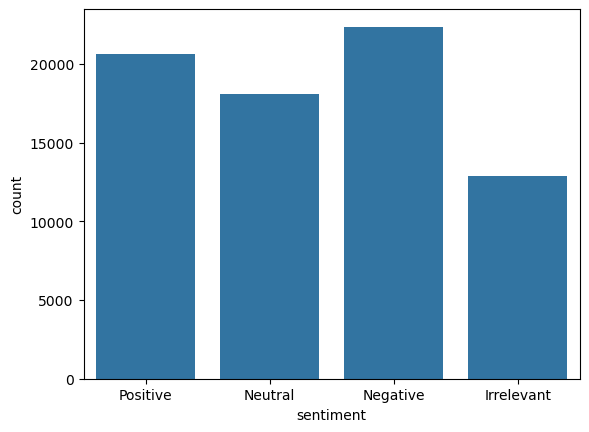

In [43]:
sns.countplot(x = y);

In [45]:
x.shape

(73996,)

In [47]:
df.dtypes

id            int64
entity       object
sentiment    object
tweet        object
dtype: object

In [49]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
swords = stopwords.words("english")

In [51]:
ps = PorterStemmer()

In [53]:
def clean_text(sent):
    tokens1 = word_tokenize(sent)
    filtered_tokens = [x.lower() for x in tokens1 if x.isalpha()]
    tokens3 = [x for x in filtered_tokens if x not in swords]
    tokens4 = [ps.stem(x) for x in tokens3]
    return tokens4

In [55]:
x_new = x.apply(lambda x: clean_text(x))
x_new

0                            [im, get, borderland, murder]
1                                     [come, border, kill]
2                              [im, get, borderland, kill]
3                           [im, come, borderland, murder]
4                            [im, get, borderland, murder]
                               ...                        
74677    [realiz, window, partit, mac, like, year, behi...
74678    [realiz, mac, window, partit, year, behind, nv...
74679    [realiz, window, partit, mac, year, behind, nv...
74680    [realiz, window, partit, mac, like, year, behi...
74681    [like, window, partit, mac, like, year, behind...
Name: tweet, Length: 73996, dtype: object

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer= clean_text)

In [59]:
data = tfidf.fit_transform(x)

In [63]:
data.toarray().shape

(73996, 19236)

In [65]:
final = data.toarray()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state= 0)
rf.fit(final, y)

### Evaluate on Validation file